<a href="https://colab.research.google.com/github/mohamedshouaib/iti/blob/main/Unsupervised_ML/t_sne_iminist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml


from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import numpy as np


In [ ]:
# Load a dataset from the OpenML repository
dataset = fetch_openml(name='mnist_784', version=1)

# Extract features and target variable
X = dataset.data/255.0
y = dataset.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
X.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [ ]:
feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]
X.columns=feat_cols
df = pd.DataFrame(X,columns=feat_cols)

df['y'] = y
df['label'] = df['y'].apply(lambda i:int(i))
df=df.drop(columns=["y"])

print('Size of the dataframe: {}'.format(df.shape))

###[out] Size of the dataframe: (70000, 785)

Size of the dataframe: (70000, 785)


In [ ]:
df.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  label  
0       0.0       0.0       0.0      5  
1       0.0       0.0       0.0      0  
2       0.0       0.0       0.0      4  
3       0.0       0.0       0.0      1  
4       0.0       0.0       0.0      9  

[5 rows x 785 columns]

In [ ]:
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [ ]:
df.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
label       0
Length: 785, dtype: int64

In [ ]:
#TODO Apply PCA to the data and put the new components in the df under names of pca-one and pca-two and pca-three



#print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


C:\Users\Ali\AppData\Local\Temp\ipykernel_29872\3274016319.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pca-one'] = pca_result[:,0]
C:\Users\Ali\AppData\Local\Temp\ipykernel_29872\3274016319.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pca-two'] = pca_result[:,1]
C:\Users\Ali\AppData\Local\Temp\ipykernel_29872\3274016319.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

<Axes: xlabel='pca-one', ylabel='pca-two'>

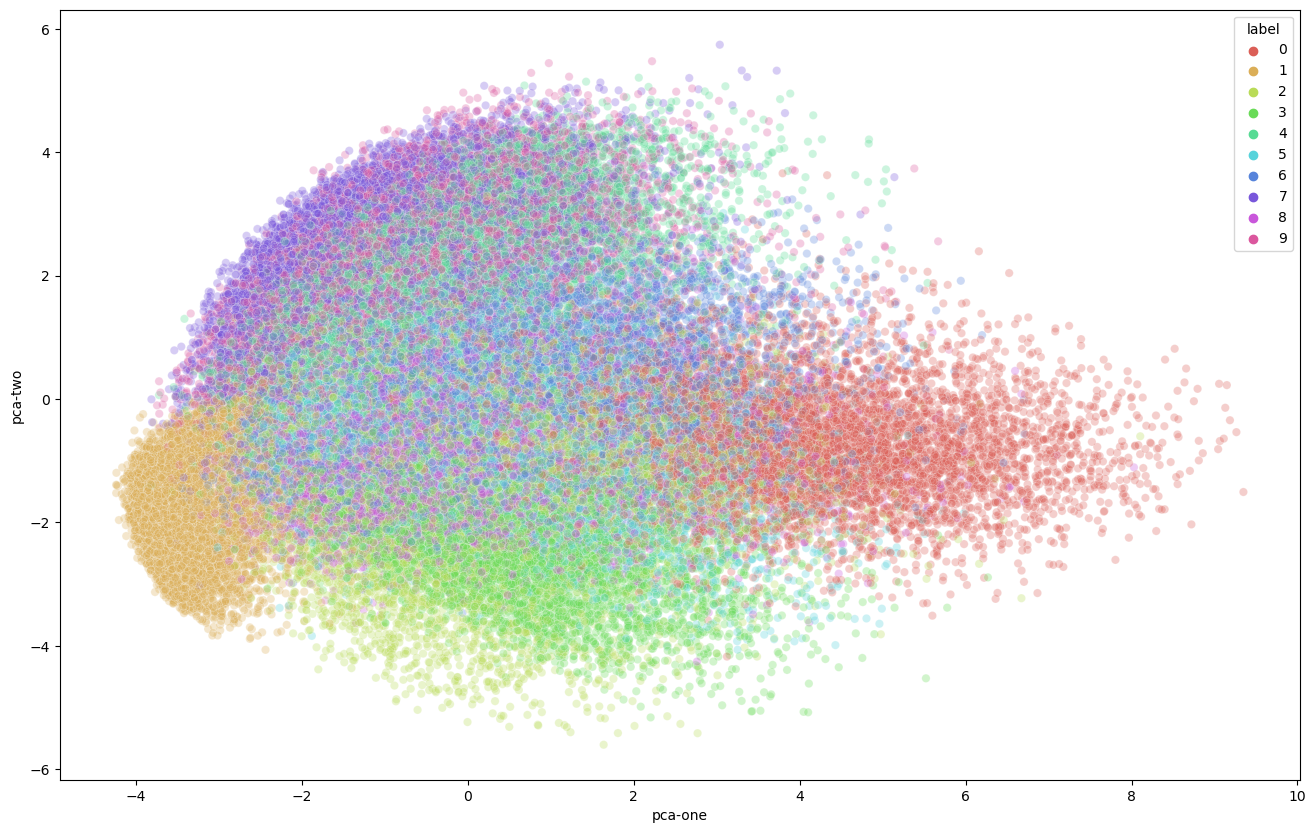

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rnderm,:],
    legend="full",
    alpha=0.3
)

In [ ]:
print(len(rndperm))
print(len(df.loc[rndperm, 'pca-one']))
print(df.loc[rndperm, 'label'])

70000
70000
46730    8
48393    4
41416    8
34506    7
43725    7
        ..
37194    6
6265     6
54886    1
860      0
15795    0
Name: label, Length: 70000, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]


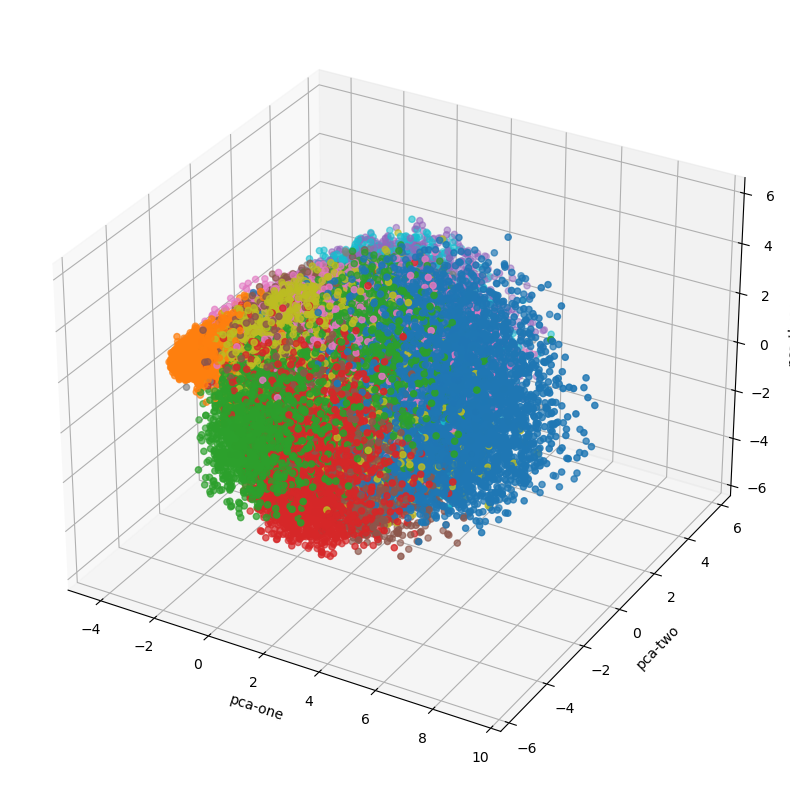

In [ ]:
fig = plt.figure(figsize=(16, 10))
#ndperm = np.random.permutation(df.shape[0])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=df.loc[rndperm, 'pca-one'],
    ys=df.loc[rndperm, 'pca-two'],
    zs=df.loc[rndperm, 'pca-three'],
    c=list(df.loc[rndperm, 'label']),
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.09925445 0.07065352 0.06193825]


In [ ]:
#ToDO apply Tsne with perplexity=40, n_iter=300 to the data_subset and see the visualiztions


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.086s...
[t-SNE] Computed neighbors for 10000 samples in 7.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.115526
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.979858
[t-SNE] KL divergence after 300 iterations: 2.800806
t-SNE done! Time elapsed:

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

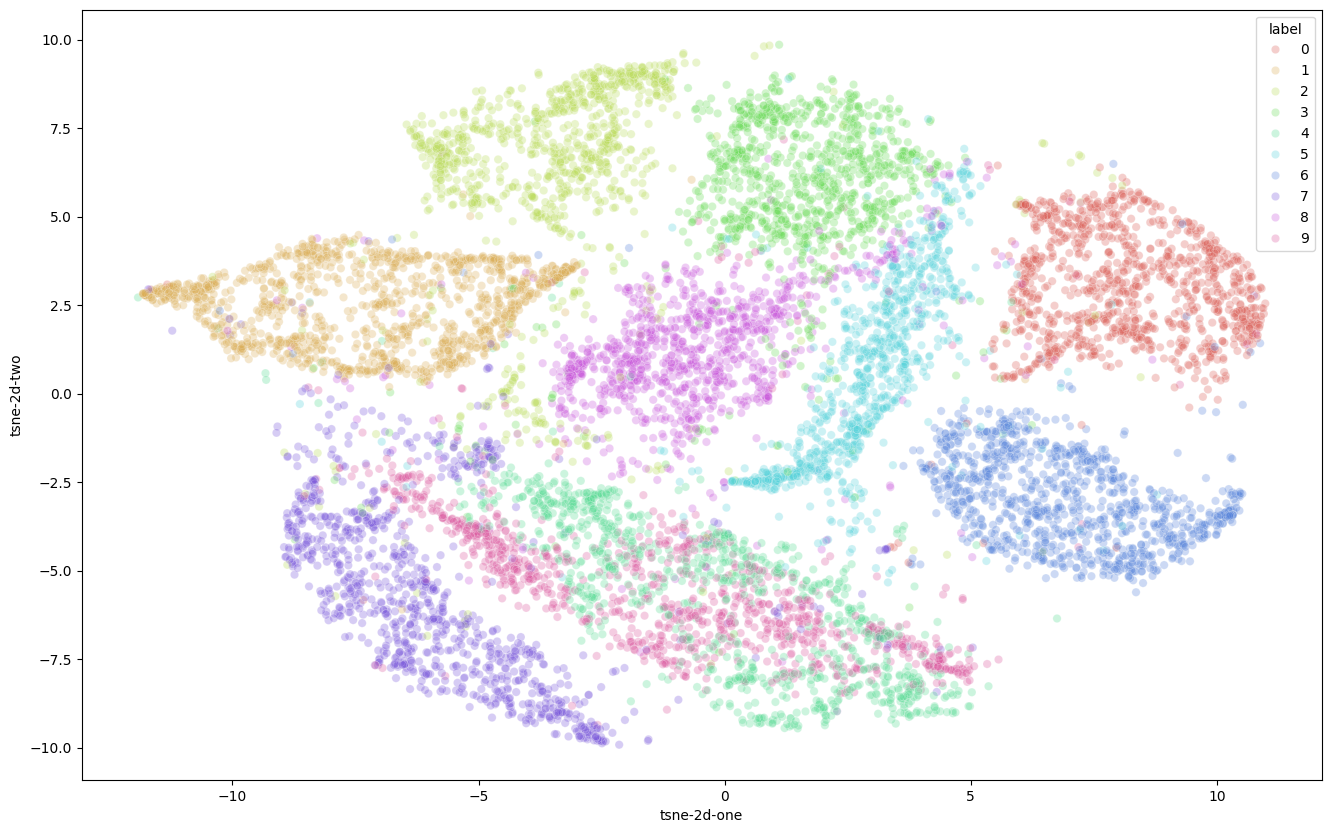

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

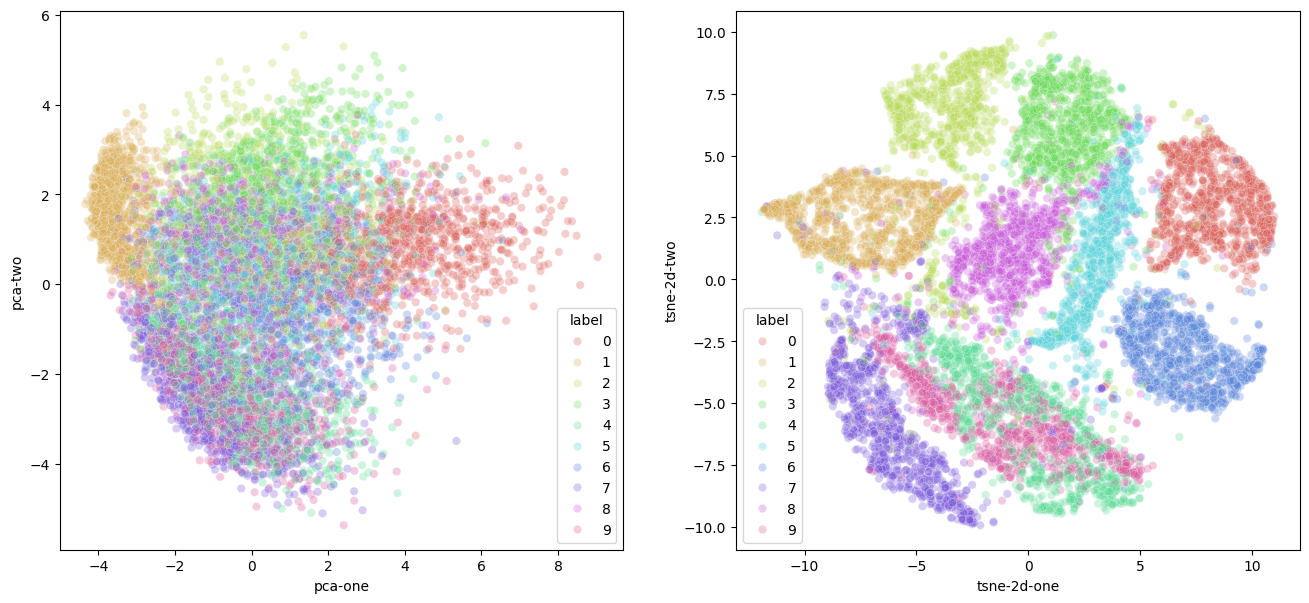

In [ ]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### We can now take the recommendations to heart and reduce the number of dimensions before feeding the data into the t-SNE algorithm. We’ll use PCA again for this. We will first create a new data set containing the fifty dimensions generated by the PCA reduction algorithm. Then, we can use this dataset to perform the t-SNE.

In [ ]:
# To Do Take 50 components from pca




Cumulative explained variation for 50 principal components: 0.8275358441860557


In [ ]:
# Apply Tsne to the 50 components take from PCA




t-SNE done! Time elapsed: 10.41283392906189 seconds


<Axes: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

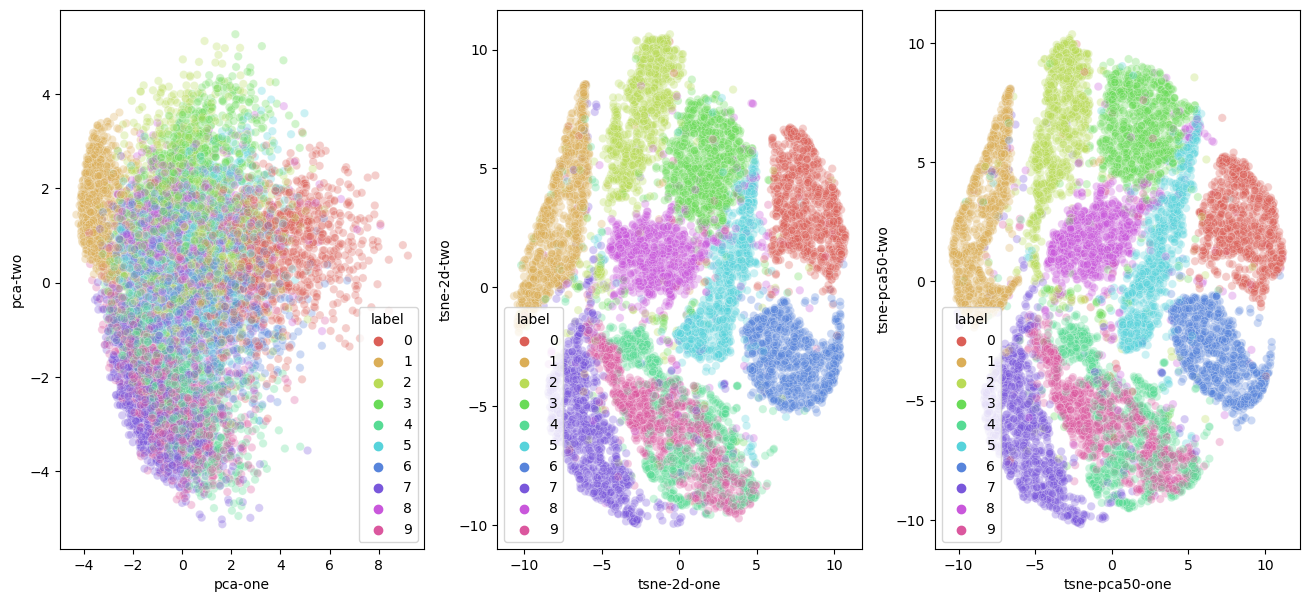

In [ ]:
plt.figure(figsize=(16,7))
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

### From this plot, you’ll notice how all the samples are spaced apart and grouped together with their respective digits. This could be a great starting point to then use a clustering algorithm to try to identify the clusters. Or you can use these two dimensions as inputs to another algorithm like a neural network.